In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/Colab Notebooks/NLP project/complaints.csv'
df = pd.read_csv(file_path)


<ipython-input-2-7604211cdfcf>:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
df = df[['Issue']].dropna().rename(columns={'Issue': 'text'})


In [ ]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df['label'] = ['complaint' if i % 2 == 0 else 'suggestion' for i in range(len(df))]


In [ ]:
# Text Preprocessing
def preprocess(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove numbers and punctuation
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess)

In [ ]:
#  Feature Engineering (TF-IDF with n-grams)
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)  # unigrams + bigrams
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['label']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, C=1.0),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(C=1.0)
}



=== Logistic Regression ===
Accuracy:  0.5000
Precision: 0.5000
Recall:    1.0000
F1 Score:  0.6667

Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

   complaint       0.50      1.00      0.67    901096
  suggestion       0.00      0.00      0.00    901096

    accuracy                           0.50   1802192
   macro avg       0.25      0.50      0.33   1802192
weighted avg       0.25      0.50      0.33   1802192



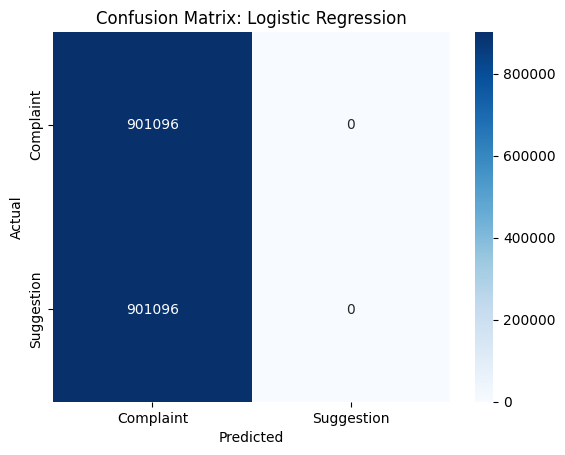


=== Naive Bayes ===
Accuracy:  0.5006
Precision: 0.5007
Recall:    0.4070
F1 Score:  0.4490

Classification Report:
              precision    recall  f1-score   support

   complaint       0.50      0.41      0.45    901096
  suggestion       0.50      0.59      0.54    901096

    accuracy                           0.50   1802192
   macro avg       0.50      0.50      0.50   1802192
weighted avg       0.50      0.50      0.50   1802192



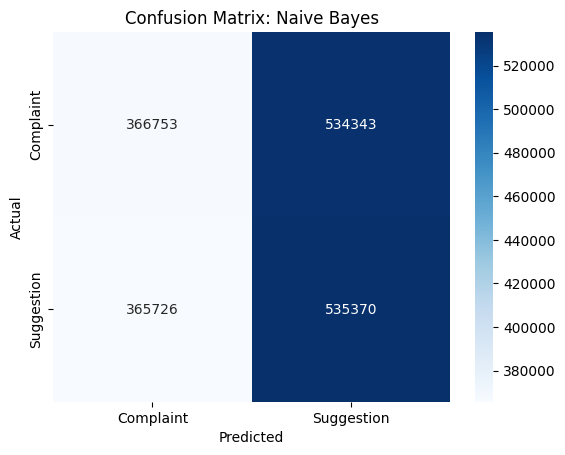


=== SVM ===
Accuracy:  0.5005
Precision: 0.5007
Recall:    0.4093
F1 Score:  0.4504

Classification Report:
              precision    recall  f1-score   support

   complaint       0.50      0.41      0.45    901096
  suggestion       0.50      0.59      0.54    901096

    accuracy                           0.50   1802192
   macro avg       0.50      0.50      0.50   1802192
weighted avg       0.50      0.50      0.50   1802192



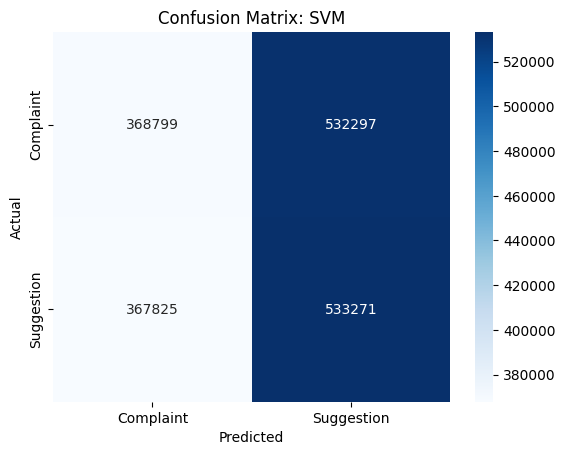

In [ ]:
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label='complaint')
    rec = recall_score(y_test, y_pred, pos_label='complaint')
    f1 = f1_score(y_test, y_pred, pos_label='complaint')
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=['complaint', 'suggestion'])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Complaint', 'Suggestion'],
                yticklabels=['Complaint', 'Suggestion'])
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [ ]:
model = models["Naive Bayes"]
def preprocess(text):
    import re
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)
user_input = input("Enter your feedback: ")
cleaned_input = preprocess(user_input)
vectorized_input = vectorizer.transform([cleaned_input])
prediction = model.predict(vectorized_input)[0]

print(f"\nPrediction: {prediction.upper()}")

Enter your feedback: problem in the app

Prediction: SUGGESTION


In [ ]:
model = models["Logistic Regression"]
def preprocess(text):
    import re
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)
user_input = input("Enter your feedback: ")
cleaned_input = preprocess(user_input)
vectorized_input = vectorizer.transform([cleaned_input])
prediction = model.predict(vectorized_input)[0]

print(f"\nPrediction: {prediction.upper()}")

Enter your feedback: add dark mode

Prediction: COMPLAINT


In [ ]:
model = models["SVM"]
def preprocess(text):
    import re
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)
user_input = input("Enter your feedback: ")
cleaned_input = preprocess(user_input)
vectorized_input = vectorizer.transform([cleaned_input])
prediction = model.predict(vectorized_input)[0]

print(f"\nPrediction: {prediction.upper()}")

Enter your feedback: add menu

Prediction: COMPLAINT
